In [1]:
# 导入相关包
import json
import pandas as pd
import numpy as np
from pyecharts.charts import Bar, Line
from pyecharts.globals import ThemeType
from pyecharts import options as opts

In [2]:
# 导入一带一路国家列表数据
fn = 'data/一带一路相关数据/countries.json'
with open(fn, 'r', encoding='utf-8') as f:
    countries = json.load(f)
# 导入疫情量化数据
df = pd.read_csv('data/比赛官方数据/owid-covid-data.csv')

## 建立医疗指标评价体系

选取四个数据作为指标的建立基础：
1. 每1万人口的医务人员
2. 每1万人口的护理和助产人员
3. 至少使用基本卫生服务的人口
4. 出生时预期寿命

In [3]:
# 提取“每1万人口中有医务人员”的数据
dct = pd.read_csv('data/比赛官方数据/World Health Statistics 2021/medicalDoctors.csv')
bri_doctors = dct[(dct['Location'].isin(countries))]
bri_dct = {}
for idx, r in bri_doctors.iterrows():
    if r[0] not in bri_dct:
        bri_dct[r[0]] = r[3]
bri_doctors = pd.DataFrame(bri_dct.items())
bri_doctors.columns = ['location', 'Medical doctors per 10,000']
bri_doctors

,location,"Medical doctors per 10,000"
0,Afghanistan,2.78
1,Albania,12.16
2,Algeria,17.19
3,Angola,2.15
4,Antigua and Barbuda,29.56
...,...,...
116,Uzbekistan,23.74
117,Vanuatu,1.65
118,Yemen,5.25
119,Zambia,11.87


In [4]:
# 提取“每1万人口的护理和助产人员”的数据
dct = pd.read_csv('data/比赛官方数据/World Health Statistics 2021/nursingAndMidwife.csv')
bri_nmp = dct[(dct['Location'].isin(countries))]
bri_dct = {}
for idx, r in bri_nmp.iterrows():
    if r[0] not in bri_dct:
        bri_dct[r[0]] = r[3]
bri_nmp = pd.DataFrame(bri_dct.items())
bri_nmp.columns = ['location', 'Nursing and midwifery personnel per 10,000']
bri_nmp

,location,"Nursing and midwifery personnel per 10,000"
0,Afghanistan,1.76
1,Albania,36.50
2,Algeria,15.48
3,Angola,4.08
4,Antigua and Barbuda,45.17
...,...,...
116,Uzbekistan,112.80
117,Vanuatu,14.25
118,Yemen,7.85
119,Zambia,13.38


In [5]:
# 提取“至少使用基本卫生服务的人口”的数据 单位：%
dct = pd.read_csv('data/比赛官方数据/World Health Statistics 2021/atLeastBasicSanitizationServices.csv')
bri_bss = dct[(dct['Location'].isin(countries)) & (dct['Dim1'] == 'Total')]
bri_dct = {}
for idx, r in bri_bss.iterrows():
    if r[0] not in bri_dct:
        bri_dct[r[0]] = r[4]
bri_bss = pd.DataFrame(bri_dct.items())
bri_bss.columns = ['location', 'BasicSanitizationServices %']
bri_bss


,location,BasicSanitizationServices %
0,Afghanistan,43.42
1,Albania,97.72
2,Algeria,87.59
3,Angola,49.88
4,Antigua and Barbuda,87.50
...,...,...
117,Uzbekistan,100.00
118,Vanuatu,34.07
119,Yemen,59.05
120,Zambia,26.37


In [6]:
# 提取“出生时预期寿命”的数据
dct = pd.read_csv('data/比赛官方数据/World Health Statistics 2021/lifeExpectancyAtBirth.csv')
bri_leab = dct[(dct['Location'].isin(countries)) & (dct['Dim1'] == 'Both sexes')]
bri_dct = {}
for idx, r in bri_leab.iterrows():
    if r[0] not in bri_dct:
        bri_dct[r[0]] = r[4]
bri_leab = pd.DataFrame(bri_dct.items())
bri_leab.columns = ['location', 'Life expectancy at birth (years)']
bri_leab


,location,Life expectancy at birth (years)
0,Afghanistan,63.21
1,Albania,78.00
2,Algeria,77.13
3,Angola,63.06
4,Antigua and Barbuda,76.45
...,...,...
114,Uzbekistan,73.01
115,Vanuatu,65.31
116,Yemen,66.63
117,Zambia,62.45


In [7]:
# 数据处理：合并表
merged = pd.merge(bri_bss, bri_doctors, how='inner', on='location')
merged = pd.merge(merged, bri_leab, how='inner', on='location')
merged = pd.merge(merged, bri_nmp, how='inner', on='location')

In [8]:
# 进行医疗指标TOPSIS熵权法预处理
medical = merged[['BasicSanitizationServices %','Medical doctors per 10,000','Life expectancy at birth (years)','Nursing and midwifery personnel per 10,000']]
medical

,BasicSanitizationServices %,"Medical doctors per 10,000",Life expectancy at birth (years),"Nursing and midwifery personnel per 10,000"
0,43.42,2.78,63.21,1.76
1,97.72,12.16,78.00,36.50
2,87.59,17.19,77.13,15.48
3,49.88,2.15,63.06,4.08
4,87.50,29.56,76.45,45.17
...,...,...,...,...
113,100.00,23.74,73.01,112.80
114,34.07,1.65,65.31,14.25
115,59.05,5.25,66.63,7.85
116,26.37,11.87,62.45,13.38


In [9]:
def entropyWeight(data):
	data = np.array(data)
	# 归一化
	P = data / data.sum(axis=0)

	# 计算熵值
	E = np.nansum(-P * np.log(P) / np.log(len(data)), axis=0)

	# 计算权系数
	return (1 - E) / (1 - E).sum()

In [10]:
def topsis(data, weight=None):
	# 归一化
	data = data / np.sqrt((data ** 2).sum())

	# 最优最劣方案
	Z = pd.DataFrame([data.min(), data.max()], index=['负理想解', '正理想解'])

	# 距离
	weight = entropyWeight(data) if weight is None else np.array(weight)
	Result = data.copy()
	Result['正理想解'] = np.sqrt(((data - Z.loc['正理想解']) ** 2 * weight).sum(axis=1))
	Result['负理想解'] = np.sqrt(((data - Z.loc['负理想解']) ** 2 * weight).sum(axis=1))

	# 综合得分指数
	Result['综合得分指数'] = Result['负理想解'] / (Result['负理想解'] + Result['正理想解'])
	Result['排序'] = Result.rank(ascending=False)['综合得分指数']

	return Result, Z, weight

res, Z, w = topsis(medical)
res.insert(loc=0, column='location', value=merged.location)
res

,location,BasicSanitizationServices %,"Medical doctors per 10,000",Life expectancy at birth (years),"Nursing and midwifery personnel per 10,000",正理想解,负理想解,综合得分指数,排序
0,Afghanistan,0.050932,0.010411,0.080706,0.003385,0.267256,0.015699,0.055482,101.0
1,Albania,0.114627,0.045538,0.099590,0.070206,0.222401,0.064436,0.224643,55.0
2,Algeria,0.102744,0.064375,0.098479,0.029775,0.226314,0.057507,0.202618,58.0
3,Angola,0.058510,0.008052,0.080514,0.007848,0.266745,0.017967,0.063104,97.0
4,Antigua and Barbuda,0.102638,0.110699,0.097611,0.086883,0.178695,0.099370,0.357362,37.0
...,...,...,...,...,...,...,...,...,...
113,Uzbekistan,0.117301,0.088904,0.093219,0.216966,0.160801,0.153689,0.488693,15.0
114,Vanuatu,0.039964,0.006179,0.083387,0.027409,0.261387,0.020410,0.072427,94.0
115,Yemen,0.069266,0.019661,0.085073,0.015099,0.257261,0.025828,0.091236,87.0
116,Zambia,0.030932,0.044452,0.079736,0.025736,0.240538,0.035347,0.128122,80.0


In [11]:
# 输出权重
Z

,BasicSanitizationServices %,"Medical doctors per 10,000",Life expectancy at birth (years),"Nursing and midwifery personnel per 10,000"
负理想解,0.008586,0.000861,0.064797,0.000112
正理想解,0.117301,0.315395,0.106255,0.256205


## 建立经济指标评价体系

选取人均GDP作为指标的建立基础

In [12]:
# 加入经济数据，以人均GDP衡量
eco = pd.read_csv('data/比赛官方数据/WEOOct2021all.csv')
bri_eco = eco[(eco['Country'].isin(countries)) & (eco['WEO Subject Code'] == 'NGDPDPC')][['Country', '2020']]
bri_eco.columns = ['location', 'gdppc']
bri_eco

,location,gdppc
9,Afghanistan,611.268
54,Albania,"5,152.56"
99,Algeria,"3,337.32"
189,Angola,"1,881.20"
234,Antigua and Barbuda,"13,967.33"
...,...,...
8559,Venezuela,"1,690.66"
8604,Vietnam,"3,522.51"
8694,Yemen,580.221
8739,Zambia,"1,023.16"


In [13]:
# 对数据进行转化
bri_eco_ = bri_eco['gdppc'].values
_ = [eval(i.replace(",", "")) for i in bri_eco_]
bri_eco['gdppc'] = _
bri_eco_value = bri_eco['gdppc']

In [14]:
# 对数据进行min-max归一化
df_norm = (bri_eco_value - bri_eco_value.min()) / (bri_eco_value.max() - bri_eco_value.min())
bri_eco['gdp'] = df_norm.values
new_bri_eco = bri_eco[['location', 'gdp']]
new_bri_eco

,location,gdp
9,Afghanistan,0.003045
54,Albania,0.041971
99,Algeria,0.026412
189,Angola,0.013931
234,Antigua and Barbuda,0.117527
...,...,...
8559,Venezuela,0.012297
8604,Vietnam,0.027999
8694,Yemen,0.002779
8739,Zambia,0.006576


In [15]:
# 合并经济与医疗指标体系
index = res[['location', '综合得分指数']]
index = pd.merge(index, new_bri_eco, how='inner', on='location')
index.columns = ['国家', '医疗水平得分', '经济水平得分']
index

,国家,医疗水平得分,经济水平得分
0,Afghanistan,0.055482,0.003045
1,Albania,0.224643,0.041971
2,Algeria,0.202618,0.026412
3,Angola,0.063104,0.013931
4,Antigua and Barbuda,0.357362,0.117527
...,...,...,...
108,Uzbekistan,0.488693,0.012956
109,Vanuatu,0.072427,0.024296
110,Yemen,0.091236,0.002779
111,Zambia,0.128122,0.006576


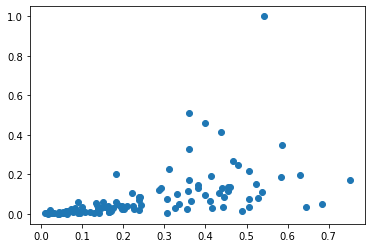

In [16]:
# 绘图
from matplotlib import pyplot as plt
# %matplotlib inline
plt.scatter(index['医疗水平得分'], index['经济水平得分'])
plt.show()

In [17]:
import pyecharts.options as opts
from pyecharts.charts import Scatter
x_data = index['医疗水平得分']
y_data = index['经济水平得分']
s = (
    Scatter(init_opts=opts.InitOpts(theme=ThemeType.MACARONS))
    .add_xaxis(xaxis_data=x_data)
    .add_yaxis(
        series_name="",
        y_axis=y_data,
        symbol_size=20,
        label_opts=opts.LabelOpts(is_show=False),
    )
    .set_series_opts()
    .set_global_opts(
        xaxis_opts=opts.AxisOpts(
            type_="value", splitline_opts=opts.SplitLineOpts(is_show=True)
        ),
        yaxis_opts=opts.AxisOpts(
            type_="value",
            axistick_opts=opts.AxisTickOpts(is_show=True),
            splitline_opts=opts.SplitLineOpts(is_show=True),
        ),
        tooltip_opts=opts.TooltipOpts(is_show=False),
    )
)
s.render_notebook()

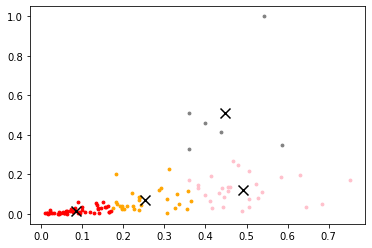

In [18]:
# 聚类
from sklearn.cluster import KMeans
X = []
for i,r in index.iterrows():
    X.append([r[1], r[2]])
X = np.array(X)
cluster = KMeans(n_clusters=4,random_state=0).fit(X)
centroid=cluster.cluster_centers_
y_pred = cluster.labels_#获取训练后对象的每个样本的标签    
centtrod = cluster.cluster_centers_
color=['red','pink','orange','gray']
fig, axi1=plt.subplots(1)
for i in range(4):
    axi1.scatter(X[y_pred==i, 0], X[y_pred==i, 1],
               marker='o',
               s=8,
               c=color[i])
axi1.scatter(centroid[:,0],centroid[:,1],marker='x',s=100,c='black')

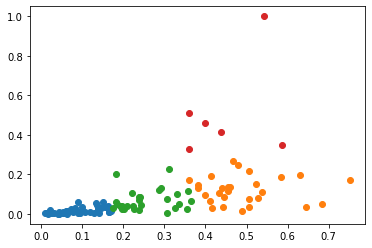

In [19]:
_ = {0:[], 1:[], 2:[], 3:[]}
for i in range(len(y_pred)):
    _[y_pred[i]].append([x_data[i], y_data[i]])
plt.scatter([i[0] for i in _[0]],[i[1] for i in _[0]])
plt.scatter([i[0] for i in _[1]],[i[1] for i in _[1]])
plt.scatter([i[0] for i in _[2]],[i[1] for i in _[2]])
plt.scatter([i[0] for i in _[3]],[i[1] for i in _[3]])
plt.show()

## 分类结果

将一带一路国家分为4类：
* 高医疗水品、高经济水平
* 高医疗水品、低经济水平
* 低医疗水品、高经济水平
* 低医疗水品、低经济水平

In [20]:
# 查看四种国家的列表
des = ["低医疗水品、低经济水平",
"高医疗水品、低经济水平",
"低医疗水品、高经济水平",
"高医疗水品、高经济水平",]
countries_name = index['国家'].values
result = []
for i in range(len(y_pred)):
    result.append([countries_name[i], des[y_pred[i]]])
index_ct = pd.DataFrame(result)
index_ct.columns = ['国家', '经济与医疗指标体系水平']
index_ct

,国家,经济与医疗指标体系水平
0,Afghanistan,低医疗水品、低经济水平
1,Albania,低医疗水品、高经济水平
2,Algeria,低医疗水品、高经济水平
3,Angola,低医疗水品、低经济水平
4,Antigua and Barbuda,低医疗水品、高经济水平
...,...,...
108,Uzbekistan,高医疗水品、低经济水平
109,Vanuatu,低医疗水品、低经济水平
110,Yemen,低医疗水品、低经济水平
111,Zambia,低医疗水品、低经济水平
